In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statstests.process import stepwise
from scipy import stats

In [2]:
import pandas as pd
big = pd.read_excel('BIG_dados.xlsx',sheet_name='Tab_sup_1')

In [11]:
numeric_cols = big.select_dtypes(include='number').columns

# Substituir valores vazios pela média nas colunas numéricas
for col in numeric_cols:
    big[col] = big[col].fillna(big[col].mean())

#print(big)

   Data da Coleta  Season Localidade Código    ph  OD (mg/L)  COD (mg/L)  \
0      2022-04-26     Dry     Bracui  BRA1D  6.35       5.36    8.462250   
1      2022-03-23  Rainny     Bracui  BRA1C  6.34       5.34    3.910000   
2      2022-02-03  Rainny     Bracui  BRA1A  6.75       5.98    3.640000   
3      2022-02-22  Rainny     Bracui  BRA1B  6.78       5.65    3.870000   
4      2022-09-27     Dry     Bracui  BRA1E  6.01       4.35   11.123333   
..            ...     ...        ...    ...   ...        ...         ...   
65     2022-02-22  Rainny    Taquari  TAQ1B  6.34       5.16    2.460000   
66     2022-09-27     Dry    Taquari  TAQ1E  6.29       5.13  120.700000   
67     2022-12-07  Rainny    Taquari  TAQ1G  7.07       6.18   85.640000   
68     2022-11-14  Rainny    Taquari  TAQ1F  6.81       5.22   99.460000   
69     2022-02-03  Rainny    Taquari  TAQ1A  6.23       4.95    2.490000   

    P (µg/mL)  NT (mg/L)  Turbidy (NTU)  ...  \
0     0.00800   1.921800           3.40

In [12]:
for col in big.drop(columns=['Data da Coleta','Localidade','Código','Season']):
    group_A = big[big['Season'] == 'Rainny'][col]
    group_B = big[big['Season'] == 'Dry'][col]
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    print(f"Teste t para {col}: t-stat = {t_stat}, p-valor = {p_val}")

Teste t para ph: t-stat = 3.074543287256206, p-valor = 0.0030341313550453722
Teste t para OD (mg/L): t-stat = 2.6032824605068834, p-valor = 0.01132685668979775
Teste t para COD (mg/L): t-stat = -2.3527977149258845, p-valor = 0.021532964479263575
Teste t para P (µg/mL): t-stat = -1.0703252417560758, p-valor = 0.288257390287912
Teste t para NT (mg/L): t-stat = -1.8870184432267292, p-valor = 0.06342724473043707
Teste t para Turbidy (NTU): t-stat = 1.3773725052712464, p-valor = 0.17291403381851977
Teste t para Total Coliforms (NMP/100ml): t-stat = 0.66426771553608, p-valor = 0.5087652447975817
Teste t para E. Coli (NMP/100ml): t-stat = 0.276892614505667, p-valor = 0.7827025181357681
Teste t para Vibrio (CFU/ml): t-stat = 0.24804573896969526, p-valor = 0.8048465382709391
Teste t para Bacterias hetrotroficas (eventos/ml): t-stat = -1.2327855051465608, p-valor = 0.221900875124754
Teste t para Bacterias autotroficas (eventos/ml): t-stat = -0.4608905920418671, p-valor = 0.64634781428266
Teste t

In [14]:
big = pd.read_excel('BIG_dados.xlsx',sheet_name='Tab_sup_1')
# Lista para armazenar os resultados
results = []

# Iterar sobre os níveis únicos de 'var_cat1'
for level in big['Localidade'].unique():
    # Filtrar o DataFrame para o nível atual de 'var_cat1'
    sbig = big[big['Localidade'] == level]


    for col in sbig.drop(columns=['Data da Coleta','Localidade','Código','Season']):
        group_A = sbig[sbig['Season'] == 'Rainny'][col]
        group_B = sbig[sbig['Season'] == 'Dry'][col]
        # Verificar se há pelo menos dois grupos para comparar
        t_stat, p_val = stats.ttest_ind(group_A, group_B)
            # Armazenar os resultados
        results.append((level, col, t_stat, p_val))

# Exibir os resultados
for level, col, t_stat, p_val in results:
    print(f"Teste t para {col} no nível {level} de 'season': t-stat = {t_stat}, p-valor = {p_val}")


C:\Users\USER\projeto1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\projeto1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\projeto1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\USER\projeto1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in mom

Teste t para ph no nível Bracui de 'season': t-stat = 1.0088690515442431, p-valor = 0.35933802755765737
Teste t para OD (mg/L) no nível Bracui de 'season': t-stat = 0.687439739166011, p-valor = 0.5223871955669681
Teste t para COD (mg/L) no nível Bracui de 'season': t-stat = 0.18609745765735575, p-valor = 0.8596828751420262
Teste t para P (µg/mL) no nível Bracui de 'season': t-stat = 0.43950149042701103, p-valor = 0.6786439435537392
Teste t para NT (mg/L) no nível Bracui de 'season': t-stat = -1.8181676098938013, p-valor = 0.12871231224470436
Teste t para Turbidy (NTU) no nível Bracui de 'season': t-stat = 0.6727363273112756, p-valor = 0.5309479402653088
Teste t para Total Coliforms (NMP/100ml) no nível Bracui de 'season': t-stat = -1.8334046003100506, p-valor = 0.12621370385978772
Teste t para E. Coli (NMP/100ml) no nível Bracui de 'season': t-stat = -1.2978559149479911, p-valor = 0.2509810592588492
Teste t para Vibrio (CFU/ml) no nível Bracui de 'season': t-stat = 0.8914735678768974, 

In [4]:
v = big.describe()
v
#v.to_excel(r'C:\Users\USER\Desktop\df1.xlsx', index=True)

,Data da Coleta,ph,OD (mg/L),COD (mg/L),P (µg/mL),NT (mg/L),Turbidy (NTU),Total Coliforms (NMP/100ml),E. Coli (NMP/100ml),Vibrio (CFU/ml),...,Bacterias autotroficas (eventos/ml),As(µg/mL),Cd (µg/mL),Co (µg/mL),Cr (µg/mL),Cu (µg/mL),Fe (mg/L),Al (mg/L),Pb (mg/L),Zn (mg/L)
count,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,43.000000,...,60.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,54.000000,70.000000
mean,2022-06-22 10:17:08.571428608,6.435143,5.010014,25.292773,0.417439,1.283716,6.557643,45686.050000,27347.837143,321.116279,...,83217.277778,0.003741,0.000111,0.000569,0.001901,0.003251,0.320161,0.122230,0.104482,0.021779
min,2022-02-03 00:00:00,6.010000,2.640000,1.660000,0.000800,0.151000,0.350000,70.000000,14.100000,0.000000,...,0.000000,0.000036,0.000015,0.000025,0.000256,0.000600,0.011753,0.002803,0.002000,0.002785
25%,2022-02-22 00:00:00,6.302500,4.705000,2.947500,0.012500,0.342500,1.360000,935.700000,100.225000,8.500000,...,34621.666667,0.000619,0.000042,0.000268,0.000300,0.000600,0.080709,0.024514,0.002000,0.004922
50%,2022-04-26 00:00:00,6.410000,5.120000,11.006667,0.138960,0.452150,2.660000,1999.150000,302.700000,30.000000,...,57551.666667,0.006000,0.000100,0.000500,0.000300,0.000600,0.153832,0.066335,0.010000,0.007055
75%,2022-11-14 00:00:00,6.557500,5.340000,36.325000,0.418350,0.845513,6.775000,10216.750000,960.600000,173.500000,...,116614.166667,0.006000,0.000100,0.000500,0.003628,0.002468,0.283359,0.126406,0.077950,0.009451
max,2022-12-07 00:00:00,7.070000,6.340000,120.700000,4.316000,14.393333,67.800000,241960.000000,241960.000000,4263.000000,...,318920.000000,0.006000,0.001657,0.006046,0.016498,0.058537,2.559251,0.979460,1.389667,0.418409
std,NaN,0.237308,0.627321,29.247158,0.753131,2.417046,11.055252,90945.831064,73072.245819,759.465640,...,70703.932322,0.002677,0.000217,0.000913,0.002910,0.008179,0.466867,0.172783,0.229793,0.067654


In [6]:
big.groupby(['Localidade','Season']).mean(numeric_only=True).reset_index().to_excel(r'C:\Users\USER\Desktop\dfmedia.xlsx', index=True)

In [4]:
big1 = pd.read_excel('data_BIG.xlsx',sheet_name='Planilha1')
big1.groupby(['Localidade']).mean(numeric_only=True).reset_index().to_excel(r'C:\Users\USER\Desktop\dfmedia1.xlsx', index=True)

In [7]:
big.groupby(['Localidade','Season']).std(numeric_only=True).reset_index().to_excel(r'C:\Users\USER\Desktop\dfdesvpad.xlsx', index=True)

In [5]:
big2 = pd.read_excel(r'C:\Users\USER\Desktop\Marcelo_BIG\data_BIG.xlsx', sheet_name='genes_resitencia')
big2.groupby(['local']).mean(numeric_only=True).reset_index().to_excel(r'C:\Users\USER\Desktop\dfmedia4.xlsx', index=True)

C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

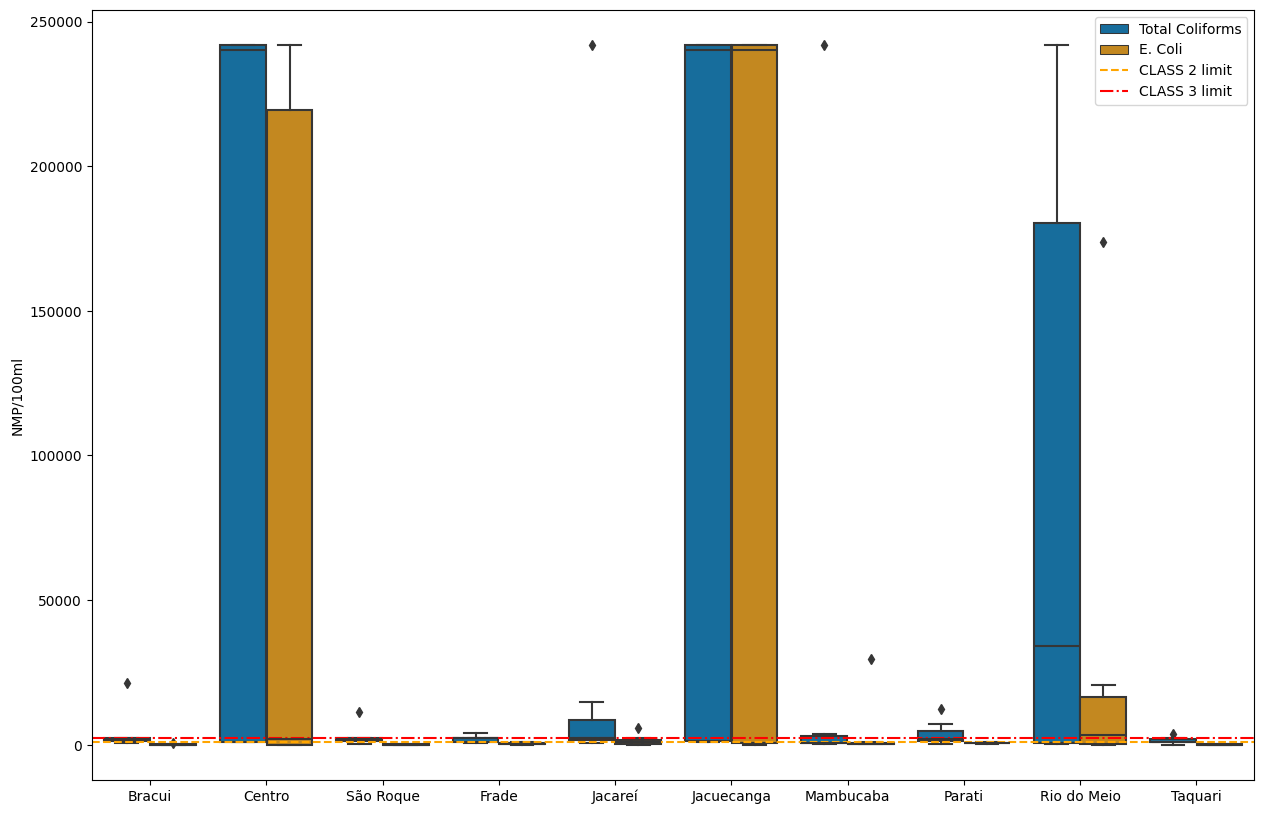

In [7]:
box = pd.read_excel('BOXPLOT.xlsx')
plt.figure(figsize=(15,10))
#sns.boxplot(x='Localidade', y='E. Coli (NMP/100ml)', data=big)

df2 = pd.melt(frame=box,
        id_vars='Localidade',
        var_name="Bacteria", 
        value_name="CFU")

ax=sns.boxplot(y='CFU', x='Localidade', 
                 data=df2, 
                 palette="colorblind",
                 hue='Bacteria')

plt.axhline(y=1000, color='orange', linestyle='--')#,label='CLASS 2 limit')
plt.axhline(y=2500, color='red', linestyle='-.')#, label='CLASS 3 limit')
ax.set_ylabel('NMP/100ml')
ax.set_xlabel('')
# handles, labels = ax.get_legend_handles_labels()
# handles.append(plt.Line2D([0], [0], color='red', linestyle='--'))
# labels.append('CLASS 2 limit')
# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
handles.extend([
    plt.Line2D([0], [0], color='orange', linestyle='--'),
    plt.Line2D([0], [0], color='red', linestyle='-.')
])
labels.extend(['CLASS 2 limit', 'CLASS 3 limit'])
#plt.legend(handles, labels, loc='upper right')
# Mostrar a legenda
plt.legend(handles, labels, loc='upper right')
plt.savefig('grafico_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

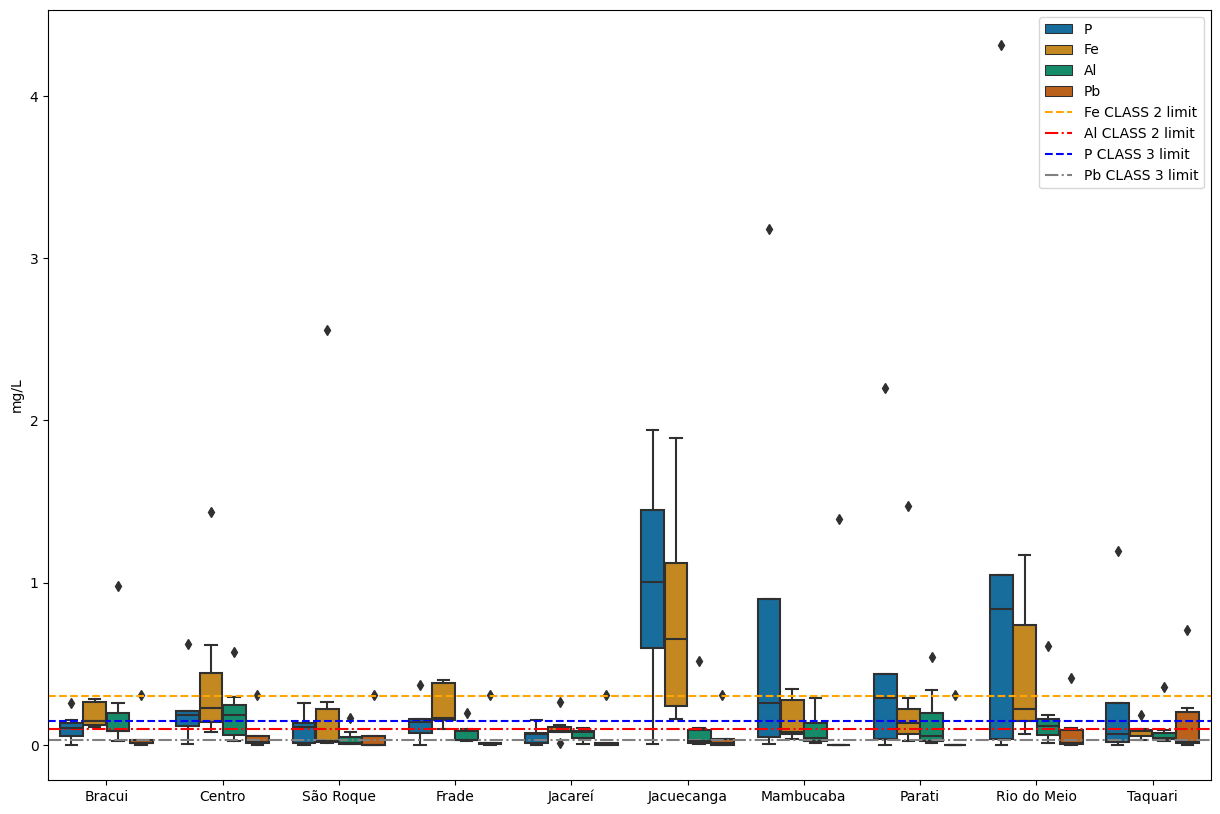

In [9]:
box = pd.read_excel('BOXPLOT.xlsx',sheet_name='Planilha2')
plt.figure(figsize=(15,10))
#sns.boxplot(x='Localidade', y='E. Coli (NMP/100ml)', data=big)

df2 = pd.melt(frame=box,
        id_vars='Localidade',
        var_name="Bacteria", 
        value_name="CFU")

ax=sns.boxplot(y='CFU', x='Localidade', 
                 data=df2, 
                 palette="colorblind",
                 hue='Bacteria')

plt.axhline(y=0.3, color='orange', linestyle='--')#,label='CLASS 2 limit')
plt.axhline(y=0.1, color='red', linestyle='-.')#, label='CLASS 3 limit')
plt.axhline(y=0.15, color='blue', linestyle='--')#,label='CLASS 2 limit')
plt.axhline(y=0.03, color='gray', linestyle='-.')#, label='CLASS 3 limit')
ax.set_ylabel('mg/L')
ax.set_xlabel('')
# handles, labels = ax.get_legend_handles_labels()
# handles.append(plt.Line2D([0], [0], color='red', linestyle='--'))
# labels.append('CLASS 2 limit')
# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
handles.extend([
    plt.Line2D([0], [0], color='orange', linestyle='--'),
    plt.Line2D([0], [0], color='red', linestyle='-.'),
    plt.Line2D([0], [0], color='blue', linestyle='--'),
    plt.Line2D([0], [0], color='gray', linestyle='-.')
])
labels.extend(['Fe CLASS 2 limit', 'Al CLASS 2 limit','P CLASS 3 limit', 'Pb CLASS 3 limit' ])
#plt.legend(handles, labels, loc='upper right')
# Mostrar a legenda
plt.legend(handles, labels, loc='upper right')
plt.savefig('grafico_boxplot2.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
big = pd.read_excel('Pasta_Navio/corr_args.xlsx',sheet_name='anova_1')
# Lista para armazenar os resultados
results = []

# Iterar sobre os níveis únicos de 'var_cat1'
for level in big['Localidade'].unique():
    # Filtrar o DataFrame para o nível atual de 'var_cat1'
    sbig = big[big['Localidade'] == level]


    for col in sbig.drop(columns=['Localidade','Season']):
        group_A = sbig[sbig['Season'] == 'Rainy'][col]
        group_B = sbig[sbig['Season'] == 'Dry'][col]
        # Verificar se há pelo menos dois grupos para comparar
        t_stat, p_val = stats.ttest_ind(group_A, group_B)
            # Armazenar os resultados
        results.append((level, col, t_stat, p_val))

# Exibir os resultados
for level, col, t_stat, p_val in results:
    print(f"Teste t para {col} no nível {level} de 'season': t-stat = {t_stat}, p-valor = {p_val}")

Teste t para Multidrug Resistance Efflux Pumps no nível CEN de 'season': t-stat = 0.7523945861557211, p-valor = 0.5303124207301921
Teste t para Cobalt-zinc-cadmium resistance no nível CEN de 'season': t-stat = -2.4406443534138273, p-valor = 0.13475961229441952
Teste t para Copper homeostasis no nível CEN de 'season': t-stat = -0.1425614314161485, p-valor = 0.8997021643327271
Teste t para Resistance to fluoroquinolones no nível CEN de 'season': t-stat = 0.06461655149565451, p-valor = 0.9543568169018075
Teste t para Multidrug Resistance, Tripartite Systems Found in Gram Negative Bacteria no nível CEN de 'season': t-stat = -0.6197676093954533, p-valor = 0.5986109151152991
Teste t para Beta-lactamase no nível CEN de 'season': t-stat = -1.8094421086805341, p-valor = 0.21209962782185318
Teste t para Arsenic resistance no nível CEN de 'season': t-stat = -0.9697564124816148, p-valor = 0.434467689880773
Teste t para Resistance to chromium compounds no nível CEN de 'season': t-stat = 2.000082220

In [23]:
cito = pd.read_excel('aut_het_bac.xlsx',sheet_name='Planilha4')
het = cito[cito['bact'] == 'het']
auto = cito[cito['bact'] == 'aut']
het
#df = het.pivot_table(index=["river"], columns=["date"],values=["events"],aggfunc=['sum'])
het.pivot_table(index=["date"], columns=["river"],values=["events"],aggfunc=['sum'])#.to_excel(r'C:\Users\USER\Desktop\het.xlsx', index=True)
df1 = pd.read_excel('het.xlsx')
df2 = pd.melt(frame=df1,
        id_vars='date',
        var_name="local", 
        value_name="event")
df2
auto.pivot_table(index=["date"], columns=["river"],values=["events"],aggfunc=['sum'])#.to_excel(r'C:\Users\USER\Desktop\aut.xlsx', index=True)
df3 = pd.read_excel('aut.xlsx')
df4 = pd.melt(frame=df3,
        id_vars='date',
        var_name="local", 
        value_name="event")

C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

<Figure size 1500x1000 with 0 Axes>

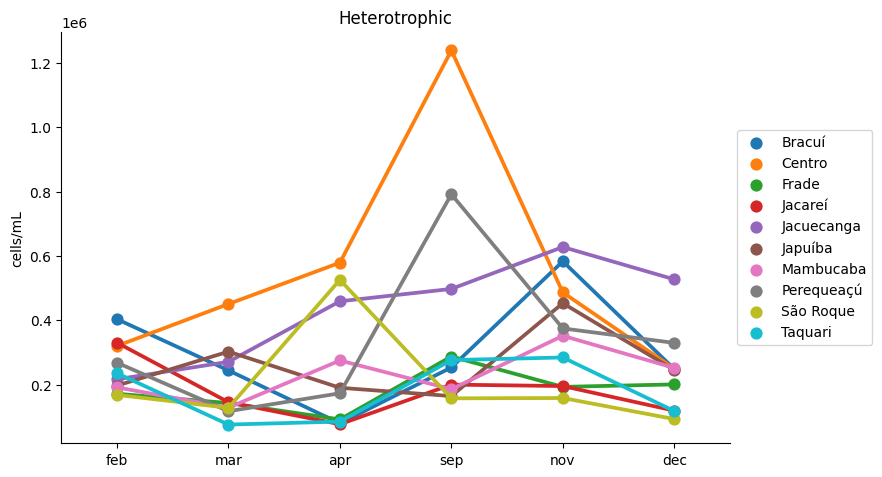

In [37]:

plt.figure(figsize=(15,10))

# ax=sns.catplot(y='event', x='date', 
#                  data=df2, 
#                  palette="colorblind",
#                  hue='local')

g=sns.catplot(x="date",y="event", hue="local", order=['feb','mar','apr','sep','nov','dec'], kind="point", 
            capsize=.15, data=df2, aspect=1.5, errwidth=0.5,errorbar = ('sd',0.1),legend=False ).set(title='Heterotrophic')
# plt.axhline(y=0.3, color='orange', linestyle='--')#,label='CLASS 2 limit')
# plt.axhline(y=0.1, color='red', linestyle='-.')#, label='CLASS 3 limit')
# plt.axhline(y=0.15, color='blue', linestyle='--')#,label='CLASS 2 limit')
# plt.axhline(y=0.03, color='gray', linestyle='-.')#, label='CLASS 3 limit')
#plt.ylabel('cells/mL')
#plt.xlabel('')

# handles, labels = ax.get_legend_handles_labels()
# handles.extend([
#     plt.Line2D([0], [0], color='orange', linestyle='--'),
#     plt.Line2D([0], [0], color='red', linestyle='-.'),
#     plt.Line2D([0], [0], color='blue', linestyle='--'),
#     plt.Line2D([0], [0], color='gray', linestyle='-.')
# ])
# labels.extend(['Fe CLASS 2 limit', 'Al CLASS 2 limit','P CLASS 3 limit', 'Pb CLASS 3 limit' ])
# #plt.legend(handles, labels, loc='upper right')
# # Mostrar a legenda
# plt.legend(handles, labels, loc='upper right')

# g.ax.axhline(y=20000, color='green', linestyle='--')
# g.ax.axhline(y=50000, color='yellow', linestyle='-.')
# g.ax.axhline(y=100000, color='red', linestyle='--')
g.ax.set_ylabel('cells/mL')
g.ax.set_xlabel('')

#sns.lineplot(y=20000, color='green', linestyle='--', label='sjsj')
#sns.lineplot(data=cts1, x='X1', y='Y1',estimator='max', color='green', legend =False)
# legend = plt.legend()
# for text in legend.get_texts():
#     text.set_fontstyle('italic')


handles, labels = g.ax.get_legend_handles_labels()
# handles.extend([
#     plt.Line2D([0], [0], color='green', linestyle='--'),
#     plt.Line2D([0], [0], color='yellow', linestyle='-.'),
#     plt.Line2D([0], [0], color='red', linestyle='--')
# #    plt.Line2D([0], [0], color='gray', linestyle='-.')
# ])
# labels.extend(['CLASS 1 limit', 'CLASS 2 limit','CLASS 3 limit'])
#plt.legend(handles, labels, loc='upper right')
# Mostrar a legenda
g.ax.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
g.savefig('grafico_hett.png', dpi=300, bbox_inches='tight')

#plt.savefig('grafico_het.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

<Figure size 1500x1000 with 0 Axes>

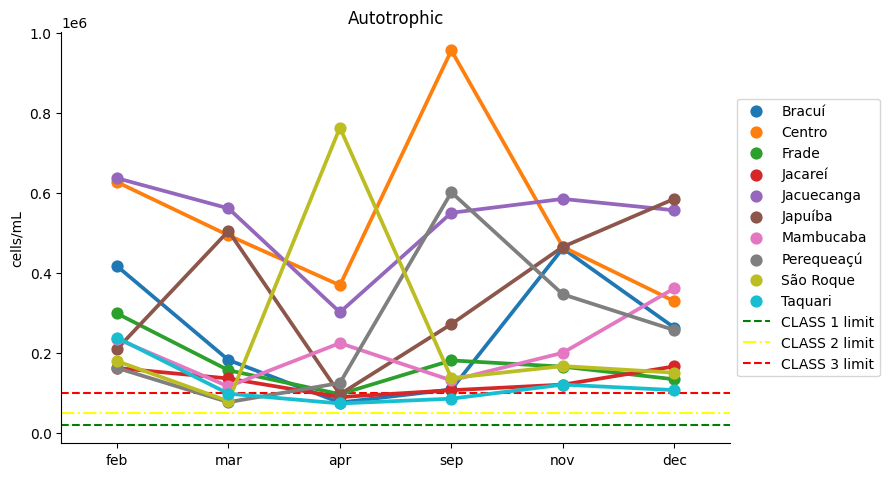

In [36]:
plt.figure(figsize=(15,10))

# ax=sns.catplot(y='event', x='date', 
#                  data=df2, 
#                  palette="colorblind",
#                  hue='local')

g = sns.catplot(x="date",y="event", hue="local", order=['feb','mar','apr','sep','nov','dec'], kind="point", 
            capsize=.15, data=df4, aspect=1.5, errwidth=0.5,errorbar = ('sd',0.1),legend=False ).set(title='Autotrophic')
# plt.hline(y=20000, color='green', linestyle='--')#,label='CLASS 2 limit')
# plt.hline(y=50000, color='yellow', linestyle='-.')#, label='CLASS 3 limit')
# plt.hline(y=100000, color='red', linestyle='--')#,label='CLASS 2 limit')
# plt.axhline(y=0.03, color='gray', linestyle='-.')#, label='CLASS 3 limit')
g.ax.axhline(y=20000, color='green', linestyle='--')
g.ax.axhline(y=50000, color='yellow', linestyle='-.')
g.ax.axhline(y=100000, color='red', linestyle='--')
g.ax.set_ylabel('cells/mL')
g.ax.set_xlabel('')

#sns.lineplot(y=20000, color='green', linestyle='--', label='sjsj')
#sns.lineplot(data=cts1, x='X1', y='Y1',estimator='max', color='green', legend =False)
# legend = plt.legend()
# for text in legend.get_texts():
#     text.set_fontstyle('italic')


handles, labels = g.ax.get_legend_handles_labels()
handles.extend([
    plt.Line2D([0], [0], color='green', linestyle='--'),
    plt.Line2D([0], [0], color='yellow', linestyle='-.'),
    plt.Line2D([0], [0], color='red', linestyle='--')
#    plt.Line2D([0], [0], color='gray', linestyle='-.')
])
labels.extend(['CLASS 1 limit', 'CLASS 2 limit','CLASS 3 limit'])
#plt.legend(handles, labels, loc='upper right')
# Mostrar a legenda
g.ax.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
g.savefig('grafico_aut.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
box = pd.read_excel('BIG_dados.xlsx',sheet_name='Planilha5')
box
box.index = box['gen']
box.drop(columns=['gen'])

,Cen_feb,Cen_mar,Cen_apr,Cen_sep,Jac_feb,Jac_mar,Jac_apr,Jac_sep,Jap_feb,Jap_mar,...,Bra_apr,Bra_sep,Fra_feb,Fra_mar,Fra_apr,Fra_sep,Foz_feb,Foz_mar,Foz_apr,Foz_sep
gen,,,,,,,,,,,,,,,,,,,,,
Klebsiella,0.043552,0.054071,0.045702,0.026337,0.138747,0.085872,0.025347,0.024146,0.263115,0.067590,...,0.329061,0.924637,0.061058,0.098693,0.067115,0.120121,0.188955,0.019204,0.055080,0.803545
Cloacibacterium,0.444052,0.297519,0.250314,0.066637,0.171406,0.445194,0.314106,0.101715,0.129872,0.141941,...,0.021336,0.000856,0.082768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pseudomonas,0.024023,0.090602,0.116224,0.199296,0.028575,0.014692,0.039418,0.081835,0.062652,0.111205,...,0.297099,0.029938,0.373813,0.398273,0.349335,0.324603,0.202846,0.876276,0.239243,0.080195
Aeromonas,0.008687,0.167359,0.169803,0.075381,0.045838,0.022378,0.066585,0.281065,0.060332,0.148394,...,0.053129,0.003951,0.145183,0.091227,0.052897,0.042810,0.021020,0.001790,0.043675,0.003516
Clostridioides,0.003637,0.007829,0.004219,0.010276,0.002975,0.001183,0.011223,0.008638,0.002103,0.018541,...,0.015433,0.011807,0.031886,0.000000,0.026296,0.095190,0.068011,0.041096,0.046008,0.009599
Bacteroides,0.068310,0.083395,0.081682,0.087006,0.091725,0.070975,0.095254,0.086010,0.076950,0.072637,...,0.035672,0.002373,0.040706,0.052030,0.091576,0.050365,0.029027,0.001038,0.037843,0.003866
Arcobacter,0.000700,0.029079,0.035131,0.059440,0.065072,0.002834,0.045635,0.226447,0.018870,0.029384,...,0.019987,0.000886,0.000000,0.037098,0.012689,0.014858,0.035562,0.000000,0.213453,0.015208
Clostridium,0.028703,0.020313,0.027869,0.060318,0.069376,0.028281,0.055647,0.021803,0.035688,0.049371,...,0.032974,0.001667,0.031208,0.077928,0.112062,0.052380,0.168727,0.006407,0.117937,0.005764
Faecalibacterium,0.041322,0.032820,0.026278,0.077193,0.044985,0.069262,0.054605,0.024778,0.079134,0.068474,...,0.006156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


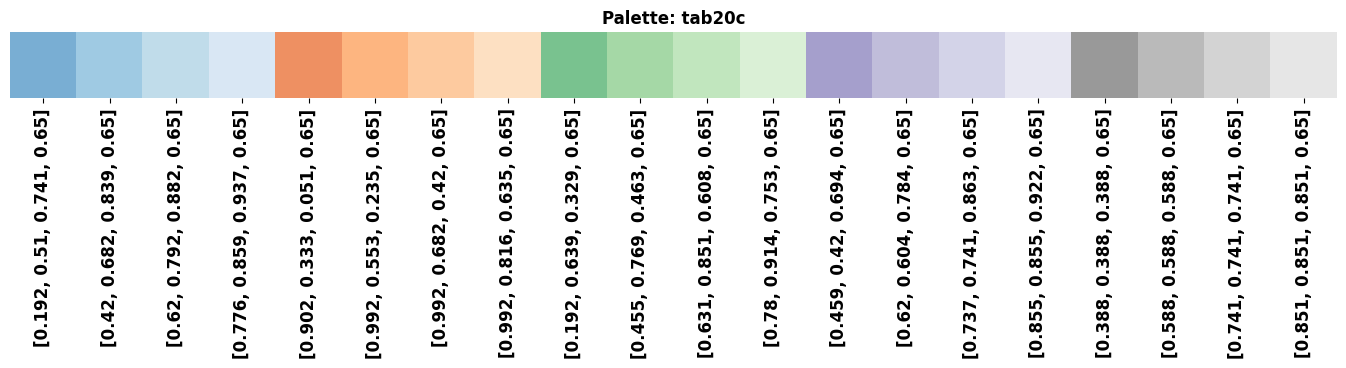

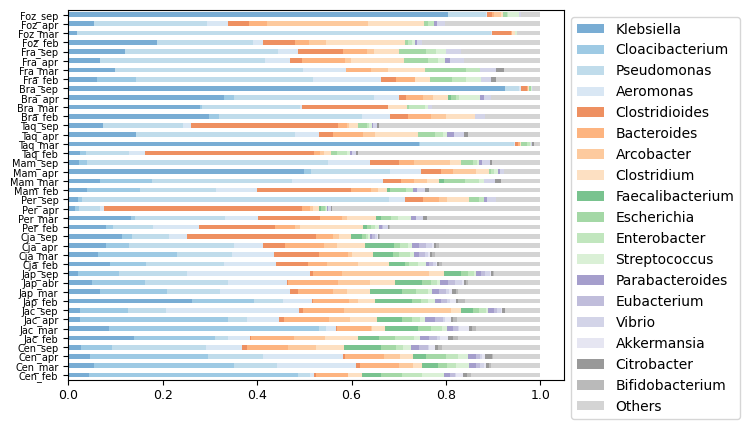

In [7]:
import import_ipynb
from colors import Palette
cores1 = Palette(20, 0.65, 'tab20c')
cores1.graph()
cores_lista1 = cores1.get_colors()
#box.plot.barh(stacked=True)
# lim = box.T
# lim = lim.iloc[1:,:]
# lim
lim_perc = lim.div(lim.sum(axis="columns"), axis="index")
#aqui vc deve tranpor a tabela, depois de obter outros ponots e dividir pela soma como acima, para %
lim_perc.plot.barh(stacked=True,color=cores_lista1)
#plt.rcParams['xtick.labelsize'] = 5
plt.xticks(fontsize=9)
plt.yticks(fontsize=7)
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontstyle('italic')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig("Figure7A.png", dpi=300, bbox_inches='tight')

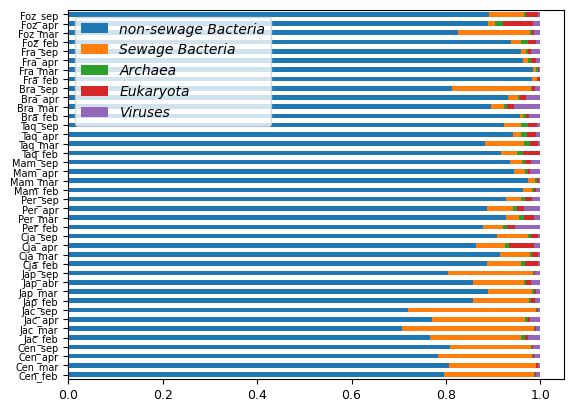

In [10]:
box = pd.read_excel('BIG_dados.xlsx',sheet_name='Planilha4')
box
box.index = box['gen']
box.drop(columns=['gen'])
lim = box.T
lim = lim.iloc[1:,:]

#lim
lim_perc = lim.div(lim.sum(axis="columns"), axis="index")
#aqui vc deve tranpor a tabela, depois de obter outros ponots e dividir pela soma como acima, para %
lim_perc.plot.barh(stacked=True)#,color=cores_lista1)
#plt.rcParams['xtick.labelsize'] = 5
plt.xticks(fontsize=9)
plt.yticks(fontsize=7)
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontstyle('italic')
#plt.legend()
plt.savefig("Figure7B.png", dpi=300, bbox_inches='tight')

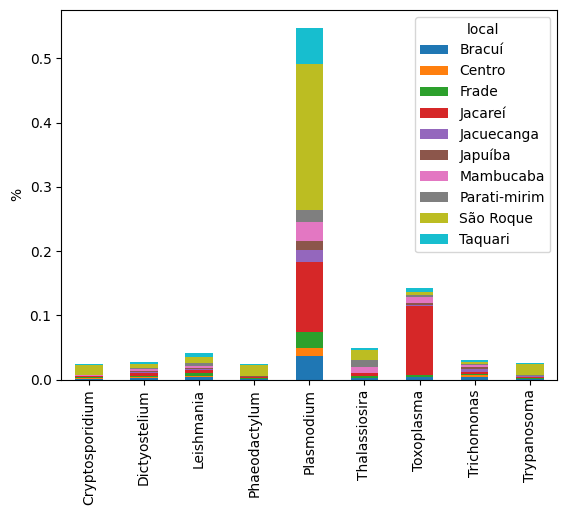

In [23]:
df3 = pd.read_excel('BIG_dados.xlsx',sheet_name='Planilha6')

df4 = pd.melt(frame=df3,
        id_vars='gen',
        var_name="local", 
        value_name="event")
df4
# df4.plot.bar(x="gen", y="event", stacked=True, hue='local')
stacked_data = df4.groupby(['gen', 'local'])['event'].sum().unstack()

# Create a stacked bar plot
stacked_data.plot(kind='bar', stacked=True)#, colormap='viridis')
plt.ylabel('%')
plt.xlabel('')
plt.savefig("Figure5A.png", dpi=300, bbox_inches='tight')

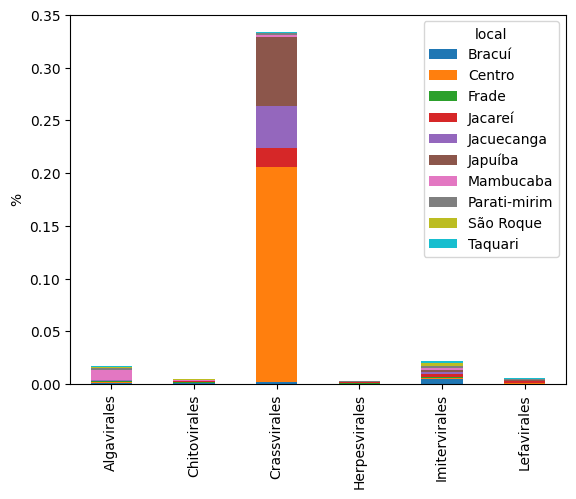

In [24]:
df3 = pd.read_excel('BIG_dados.xlsx',sheet_name='Planilha7')

df4 = pd.melt(frame=df3,
        id_vars='gen',
        var_name="local", 
        value_name="event")
df4
# df4.plot.bar(x="gen", y="event", stacked=True, hue='local')
stacked_data = df4.groupby(['gen', 'local'])['event'].sum().unstack()

# Create a stacked bar plot
stacked_data.plot(kind='bar', stacked=True)#, colormap='viridis')
plt.ylabel('%')
plt.xlabel('')
plt.savefig("Figure5B.png", dpi=300, bbox_inches='tight')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
v = pd.read_excel('dfmedia.xlsx' , sheet_name = 'media_all_dendogram')
v.index = v['Rio']
v = v.iloc[:,1:]
v

,Efflux Pumps,Co-zn-cd res.,Cu hom.;,Res. to fluoroquinolones,G. Neg. Bacteria,Beta-lact.,Arsenic res.,Cr res.,Zn res.,Cu tolerance,...,Faecalicatena,Anaerotruncus,Faecalibacterium,Clostridioides,Methanobrevibacter,Helicobacter,Providencia,Yersinia,Anaerostipes,Leptospira
Rio,,,,,,,,,,,,,,,,,,,,,
Bracui,0.783364,0.803820,0.366607,0.315520,0.087190,0.120846,0.061465,0.071122,0.044274,0.044500,...,0.000000,0.000000,0.000034,0.002228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000107
Centro,1.096762,0.979710,0.567923,0.261068,0.171318,0.132695,0.142876,0.055750,0.040842,0.070833,...,0.000000,0.000116,0.009277,0.001346,0.000506,0.000039,0.000129,0.000094,0.000000,0.000000
Frade,0.941337,0.927075,0.358140,0.263405,0.125127,0.098728,0.077884,0.110726,0.034555,0.031266,...,0.000000,0.000000,0.000000,0.000410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000029
Jacareí,0.959291,0.853180,0.464549,0.285344,0.137083,0.130177,0.079978,0.070887,0.098381,0.053048,...,0.000000,0.000000,0.003302,0.010889,0.000280,0.000000,0.000000,0.000000,0.000000,0.000236
Jacuecanga,1.104777,0.850830,0.497212,0.273822,0.136799,0.119505,0.130334,0.032866,0.061759,0.067458,...,0.000107,0.000193,0.012841,0.001523,0.000986,0.000150,0.000113,0.000139,0.000068,0.000000
Japuíba,1.086232,0.925088,0.514396,0.256875,0.162799,0.102510,0.117967,0.068691,0.054526,0.063961,...,0.000000,0.000029,0.008198,0.000893,0.000294,0.000069,0.000000,0.000108,0.000000,0.000032
Mambucaba,0.890212,0.856844,0.363752,0.283540,0.116572,0.116609,0.068508,0.085968,0.046294,0.044247,...,0.000000,0.000000,0.000082,0.001958,0.000000,0.000000,0.000000,0.000032,0.000000,0.000082
Perequeaçú,0.893896,0.785063,0.362888,0.282828,0.108046,0.121140,0.056079,0.068985,0.102337,0.042170,...,0.000000,0.000000,0.000324,0.014130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000198
São Roque,1.013224,0.984622,0.525546,0.283521,0.144418,0.124217,0.084805,0.093503,0.083954,0.043555,...,0.000000,0.000000,0.000000,0.002466,0.000000,0.000097,0.000000,0.000000,0.000000,0.000148


In [6]:
scaler = StandardScaler()
t = scaler.fit_transform(v)
t


array([[-1.81356687e+00, -1.27993772e+00, -9.78596796e-01,
         2.19371914e+00, -1.90617358e+00,  4.49687950e-02,
        -9.07694914e-01, -1.24624796e-01, -8.40230333e-01,
        -4.94745708e-01,  2.85696475e+00, -1.53788816e+00,
        -7.18237173e-01, -5.43276126e-01, -3.72828189e-01,
         1.87317353e+00, -9.71311936e-01, -6.54926468e-01,
        -6.58093334e-02,  8.72137422e-01, -3.15701557e-01,
        -2.69624049e-01,  4.23537629e-01,  1.07820403e-02,
        -9.70472313e-01,  1.31076225e-01, -5.43930822e-01,
        -7.69088777e-01, -5.77454008e-01, -8.46179572e-01,
        -3.08721974e-01, -4.78759698e-01, -7.29071762e-01,
        -7.18911830e-01, -6.04514006e-01, -6.47159240e-01,
        -1.07322582e+00, -7.70763468e-01, -7.83711093e-01,
        -6.30979720e-01, -7.22542429e-01,  2.57973676e+00,
        -9.38410338e-01, -5.88817704e-01, -1.84305016e+00,
        -8.27730063e-01, -8.76658547e-01, -5.79706088e-01,
        -7.08525012e-01, -4.99913256e-01, -1.73452127e+0

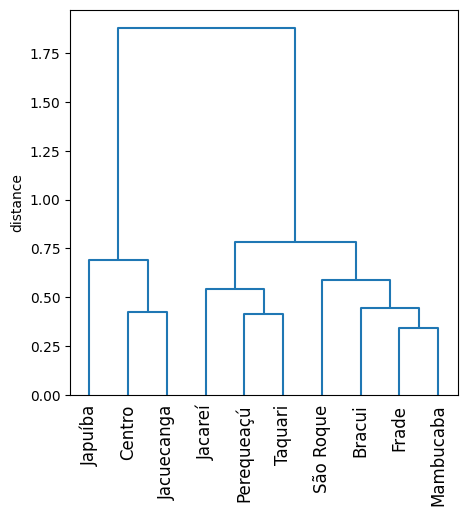

In [8]:
W = linkage(t, method='complete',metric='braycurtis') #method complete
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(W, labels=v.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.savefig("Figure33.png", dpi=300, bbox_inches='tight')

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(t)
kmeans.labels_

C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 0, 1, 2, 0, 0, 0, 0])

In [12]:
X = v.values
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X1 = pca.transform(X)
#X1.to_excel(r'C:\Users\USER\Desktop\uh.xlsx', index=True)
df = pd.DataFrame(X1, columns=['PC1', 'PC2'])
df = df/1000000
df
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(df)
kmeans.labels_
#plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
df['cluster'] = kmeans.labels_
df

C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,cluster
0,-0.041714,0.028183,0
1,0.152400,0.017914,1
2,-0.066359,-0.008760,0
3,-0.045382,-0.031881,0
4,0.163735,-0.010497,1
5,0.027146,-0.029570,2
6,-0.031445,-0.012229,0
7,-0.032003,0.040332,0
8,-0.053814,0.016917,0
9,-0.072563,-0.010409,0


In [ ]:
box = pd.read_excel('BIG_dados.xlsx',sheet_name='Planilha4')
box
box.index = box['gen']
box.drop(columns=['gen'])
lim = box.T
lim = lim.iloc[1:,:]

#lim
lim_perc = lim.div(lim.sum(axis="columns"), axis="index")
#aqui vc deve tranpor a tabela, depois de obter outros ponots e dividir pela soma como acima, para %
lim_perc.plot.barh(stacked=True)#,color=cores_lista1)
#plt.rcParams['xtick.labelsize'] = 5
plt.xticks(fontsize=9)
plt.yticks(fontsize=7)
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontstyle('italic')
#plt.legend()
plt.savefig("Figure7B.png", dpi=300, bbox_inches='tight')